In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

import urllib.request, json
import requests
import urllib.parse
import datetime

In [4]:
admit_url = 'https://data.cityofnewyork.us/resource/6teu-xtgp.json'
dis_url = 'https://data.cityofnewyork.us/resource/94ri-3ium.json'

def get_data(url,date_column,startdatetime,enddatetime):
    query = (url+'?'
            "$select=*"
            "&$where=%s between '"+startdatetime+"' and '"+enddatetime+"'"
            "&$limit=500000")%(date_column)
    query = query.replace(" ", "%20")
    print(query)
    response = urllib.request.urlopen(query)
    data = json.loads(response.read())
    
    #store in dataframe
    df = pd.DataFrame(data,columns = data[0].keys())
    
    return df

In [8]:
admissions = get_data(admit_url,'admitted_dt','2014-11-01T00:00:00.000', '2023-06-30T00:00:00.000')
admissions.head()

https://data.cityofnewyork.us/resource/6teu-xtgp.json?$select=*&$where=admitted_dt%20between%20'2014-11-01T00:00:00.000'%20and%20'2023-06-30T00:00:00.000'&$limit=500000


,inmateid,admitted_dt,discharged_dt,race,gender,inmate_status_code,top_charge
0,10008773,2018-08-23T10:15:28.000,2018-08-23T11:14:00.000,UNKNOWN,M,DE,VTL 1192.3
1,20037818,2018-08-05T19:13:46.000,2018-08-10T16:46:05.000,UNKNOWN,M,DE,NaN
2,20197484,2018-08-14T02:08:36.000,NaN,BLACK,F,DE,120.05
3,20150289,2018-08-02T00:05:22.000,NaN,UNKNOWN,M,DPV,NaN
4,20122449,2018-08-23T18:34:24.000,NaN,UNKNOWN,M,DE,120.05


In [12]:
print(len(admissions),admissions['inmateid'].nunique())

323447 153396


In [10]:
discharges = get_data(dis_url,'discharged_dt','2014-11-01T00:00:00.000', '2023-06-30T00:00:00.000')
print(len(discharges))
discharges.head()

https://data.cityofnewyork.us/resource/94ri-3ium.json?$select=*&$where=discharged_dt%20between%20'2014-11-01T00:00:00.000'%20and%20'2023-06-30T00:00:00.000'&$limit=500000
326086


,inmateid,admitted_dt,discharged_dt,race,gender,age,inmate_status_code,top_charge
0,20190778,2018-05-30T15:38:41.000,2018-08-16T06:12:04.000,UNKNOWN,M,25,CS,220.09
1,20130019,2018-02-24T20:15:24.000,2018-08-22T11:24:00.000,UNKNOWN,M,25,DE,NaN
2,41370,2018-07-30T15:58:35.000,2018-08-06T13:21:01.000,BLACK,M,49,DE,NaN
3,20035180,2018-04-30T13:34:00.000,2018-08-01T21:42:02.000,BLACK,M,49,DE,NaN
4,20115029,2018-08-31T00:39:46.000,2018-08-31T13:01:03.000,UNKNOWN,M,38,DE,NaN


In [13]:
print(len(discharges),discharges['inmateid'].nunique())

326086 155234


In [16]:
missing_inmate_ids = list(set(discharges['inmateid'].unique())-set(admissions['inmateid'].unique()))

In [22]:
#try to create a sudo id combining the inmate id and the occurance 
# Sort the DataFrame by 'admitted_dt' column in ascending order
admissions.sort_values(by='admitted_dt', inplace=True)

# Create a new column 'sudo_inmateid' by combining 'inmateid' and occurrence
admissions['sudo_inmateid'] = admissions.groupby('inmateid').cumcount() + 1
admissions['sudo_inmateid'] = admissions['inmateid'].astype(str) + '_' + admissions['sudo_inmateid'].astype(str)
admissions['sudo_inmateid'] = admissions['sudo_inmateid'].astype(str)
admissions.head()

,inmateid,admitted_dt,discharged_dt,race,gender,inmate_status_code,top_charge,sudo_inmateid
109992,56412,2014-11-01T00:08:13.000,2015-07-01T03:28:03.000,UNKNOWN,M,CS,165.40,56412_1
182623,20130131,2014-11-01T00:11:00.000,2014-11-05T20:09:00.000,UNKNOWN,M,DE,NaN,20130131_1
97682,20142212,2014-11-01T00:12:00.000,2014-11-05T16:10:03.000,UNKNOWN,F,DE,NaN,20142212_1
25973,10000638,2014-11-01T00:30:02.000,2014-11-04T02:52:00.000,BLACK,M,DE,NaN,10000638_1
96485,71639,2014-11-01T00:32:34.000,2014-11-01T00:36:02.000,BLACK,M,DE,NaN,71639_1


In [23]:
print(len(admissions),admissions['sudo_inmateid'].nunique())

323447 323447


In [24]:
#lets do the same for discharge dataset
#try to create a sudo id combining the inmate id and the occurance 
# Sort the DataFrame by 'admitted_dt' column in ascending order
discharges.sort_values(by='discharged_dt', inplace=True)

# Create a new column 'sudo_inmateid' by combining 'inmateid' and occurrence
discharges['sudo_inmateid'] = discharges.groupby('inmateid').cumcount() + 1
discharges['sudo_inmateid'] = discharges['inmateid'].astype(str) + '_' + discharges['sudo_inmateid'].astype(str)
discharges['sudo_inmateid'] = discharges['sudo_inmateid'].astype(str)
print(len(discharges),discharges['sudo_inmateid'].nunique())
discharges.head()

326086 326086


,inmateid,admitted_dt,discharged_dt,race,gender,age,inmate_status_code,top_charge,sudo_inmateid
139560,71639,2014-11-01T00:32:34.000,2014-11-01T00:36:02.000,BLACK,M,49,DE,NaN,71639_1
144902,20085712,2014-09-26T23:45:00.000,2014-11-01T00:53:00.000,BLACK,M,34,DE,NaN,20085712_1
89593,39523,2014-10-26T12:01:15.000,2014-11-01T00:53:01.000,BLACK,M,38,DE,NaN,39523_1
77489,117635,2014-10-30T16:03:12.000,2014-11-01T00:53:03.000,BLACK,M,44,DE,NaN,117635_1
29686,20140607,2014-10-02T17:01:37.000,2014-11-01T01:13:04.000,UNKNOWN,M,21,DE,NaN,20140607_1


In [21]:
admissions.dtypes

inmateid              object
admitted_dt           object
discharged_dt         object
race                  object
gender                object
inmate_status_code    object
top_charge            object
sudo_inmateid         object
dtype: object

In [32]:
#left join admission table to discharge table on sudo inmate id
joined_df = admissions.merge(discharges, on = 'sudo_inmateid',suffixes = ['_adm','_dis'], how = 'left')
print(len(joined_df))
joined_df.head(10)

323447


,inmateid_adm,admitted_dt_adm,discharged_dt_adm,race_adm,gender_adm,inmate_status_code_adm,top_charge_adm,sudo_inmateid,inmateid_dis,admitted_dt_dis,discharged_dt_dis,race_dis,gender_dis,age,inmate_status_code_dis,top_charge_dis
0,56412,2014-11-01T00:08:13.000,2015-07-01T03:28:03.000,UNKNOWN,M,CS,165.40,56412_1,56412,2014-11-01T00:08:13.000,2015-07-01T03:28:03.000,UNKNOWN,M,47,CS,165.40
1,20130131,2014-11-01T00:11:00.000,2014-11-05T20:09:00.000,UNKNOWN,M,DE,NaN,20130131_1,20130131,2014-11-01T00:11:00.000,2014-11-05T20:09:00.000,UNKNOWN,M,45,DE,NaN
2,20142212,2014-11-01T00:12:00.000,2014-11-05T16:10:03.000,UNKNOWN,F,DE,NaN,20142212_1,20142212,2014-11-01T00:12:00.000,2014-11-05T16:10:03.000,UNKNOWN,F,57,DE,NaN
3,10000638,2014-11-01T00:30:02.000,2014-11-04T02:52:00.000,BLACK,M,DE,NaN,10000638_1,10000638,2014-11-01T00:30:02.000,2014-11-04T02:52:00.000,BLACK,M,33,DE,NaN
4,71639,2014-11-01T00:32:34.000,2014-11-01T00:36:02.000,BLACK,M,DE,NaN,71639_1,71639,2014-11-01T00:32:34.000,2014-11-01T00:36:02.000,BLACK,M,49,DE,NaN
5,20140584,2014-11-01T00:32:34.000,2014-11-04T02:51:03.000,BLACK,M,DE,NaN,20140584_1,20140584,2014-11-01T00:32:34.000,2014-11-04T02:51:03.000,BLACK,M,36,DE,NaN
6,20142208,2014-11-01T00:35:43.000,2016-09-08T03:57:01.000,BLACK,M,SSR,NaN,20142208_1,20142208,2014-11-01T00:35:43.000,2016-09-08T03:57:01.000,BLACK,M,30,SSR,NaN
7,20008038,2014-11-01T00:37:40.000,2015-04-24T03:27:01.000,BLACK,M,DPV,NaN,20008038_1,20008038,2014-11-01T00:37:40.000,2015-04-24T03:27:01.000,BLACK,M,33,DPV,NaN
8,165949,2014-11-01T00:39:25.000,2015-03-10T20:00:03.000,UNKNOWN,M,DE,NaN,165949_1,165949,2014-11-01T00:39:25.000,2015-03-10T20:00:03.000,UNKNOWN,M,42,DE,NaN
9,20142215,2014-11-01T00:40:00.000,2014-11-05T19:10:00.000,BLACK,M,DE,220.03,20142215_1,20142215,2014-11-01T00:40:00.000,2014-11-05T19:10:00.000,BLACK,M,63,DE,220.03


In [33]:
len(joined_df[joined_df['discharged_dt_adm'].isna()])

86225

In [34]:
len(joined_df[joined_df['discharged_dt_dis'].isna()])

8055

In [36]:
joined_df['admitted_dt_adm'] = pd.to_datetime(joined_df['admitted_dt_adm'])
joined_df['admitted_dt_dis'] = pd.to_datetime(joined_df['admitted_dt_dis'])
joined_df['discharged_dt_adm'] = pd.to_datetime(joined_df['discharged_dt_adm'])
joined_df['discharged_dt_dis'] = pd.to_datetime(joined_df['discharged_dt_dis'])


In [37]:
print(joined_df['admitted_dt_adm'].min(),joined_df['admitted_dt_adm'].max())
print(joined_df['admitted_dt_dis'].min(),joined_df['admitted_dt_dis'].max())

2014-11-01 00:08:13 2023-06-29 23:57:28
1990-06-21 08:45:26 2023-06-29 18:55:08


In [39]:
print(len(joined_df[joined_df['discharged_dt_adm'] == joined_df['discharged_dt_dis']]))

221714


In [40]:
print(len(joined_df[joined_df['admitted_dt_adm'] == joined_df['admitted_dt_dis']]))

291897


In [41]:
joined_df[joined_df['discharged_dt_adm'] != joined_df['discharged_dt_dis']]

,inmateid_adm,admitted_dt_adm,discharged_dt_adm,race_adm,gender_adm,inmate_status_code_adm,top_charge_adm,sudo_inmateid,inmateid_dis,admitted_dt_dis,discharged_dt_dis,race_dis,gender_dis,age,inmate_status_code_dis,top_charge_dis
272,20051343,2014-11-03 03:37:59,2014-11-05 10:31:01,BLACK,M,DE,NaN,20051343_1,20051343,2014-09-07 01:58:39,2014-11-03 03:37:05,BLACK,M,40,CS,160.05
273,20099746,2014-11-03 03:43:08,2014-12-01 00:09:00,BLACK,M,SSR,220.39,20099746_1,20099746,2014-10-16 11:12:36,2014-11-03 03:43:00,BLACK,M,44,CS,220.03
386,24637,2014-11-04 00:57:27,2014-12-12 06:41:00,BLACK,M,CS,120.00,24637_1,24637,2014-10-16 11:04:53,2014-11-03 05:16:03,BLACK,M,35,CS,155.25
398,148892,2014-11-04 04:49:01,2014-12-02 01:15:04,BLACK,M,DPV,NaN,148892_1,148892,2014-10-28 12:10:28,2014-11-04 04:48:05,BLACK,M,46,CSP,VTL 511
399,10004385,2014-11-04 04:59:24,2014-11-07 14:51:05,BLACK,M,DE,NaN,10004385_1,10004385,2014-10-31 19:58:00,2014-11-04 04:59:01,BLACK,M,30,CS,265.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323442,20073873,2023-06-29 22:01:00,NaT,BLACK,M,DE,140.25,20073873_8,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
323443,20057064,2023-06-29 22:47:00,NaT,BLACK,M,DE,155.30,20057064_5,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
323444,20224973,2023-06-29 22:51:00,NaT,UNKNOWN,M,DE,215.51,20224973_2,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
323445,20225550,2023-06-29 23:49:00,NaT,ASIAN,M,DE,215.51,20225550_1,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


In [38]:
start_date = '2014-11-01'
end_date = '2023-06-29'

# daily dates
dates = pd.date_range(start=start_date, end=end_date, freq='D')
print(len(dates))

3163


In [42]:
# Step 2: Create 'month' column
joined_df['admitted_dt_final'] = joined_df['admitted_dt_adm'].dt.to_period('D').dt.to_timestamp()
joined_df['discharge_dt_final'] = joined_df['discharged_dt_adm'].dt.to_period('D').dt.to_timestamp()

In [43]:
daily_pop = []
for day in dates:
    daily_pop.append(joined_df[(joined_df['admitted_dt_final'] <= day) &
                                 ((joined_df['discharge_dt_final'] > day)|(joined_df['discharge_dt_final'].isna()))]['sudo_inmateid'].nunique()) 

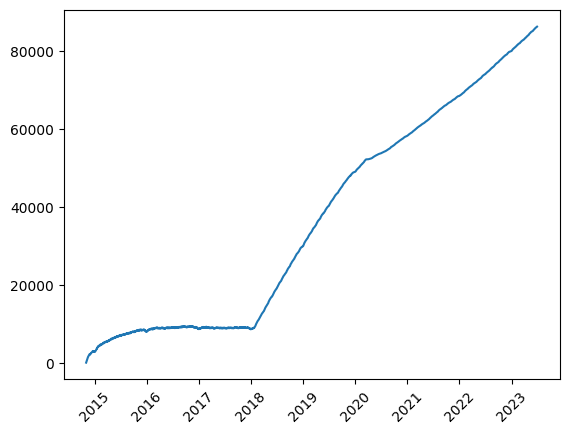

In [44]:
plt.plot(dates,daily_pop)
plt.xticks(rotation=45)  # Rotates x-axis tick labels for better readability
plt.show()

In [45]:
print(daily_pop[0],daily_pop[-1])

120 86303
